In [1]:
from pathlib import Path
from datasets import load_dataset, DownloadMode
import torch
import os
import glob
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from llama_wrapper import LlamaPromptLens, run_logit_lens_batched, run_logit_lens_autoregressive_batched

In [2]:
from enum import Enum

class Models(Enum):
    LAIN8B = "Models/LLaMA3Instruct"
    HF100B = "Models/HF1BitLLM100Btokens"


class Names(Enum):
    LAIN8B = "Meta-Llama-3-8B-Instruct-fp"
    HF100B = "Llama3-8B-1.58-100B-tokens"

In [ ]:
model = AutoModelForCausalLM.from_pretrained(Models.LAIN8B.value) 

In [3]:
filepath = r'D:\LogitLensData\nq'

destination_path = str(Path(filepath))
nq_dataset = load_dataset(
    'sentence-transformers/natural-questions',
    split={
        'train': 'train[:200]'
    },
    cache_dir=destination_path,
    download_mode=DownloadMode.REUSE_DATASET_IF_EXISTS,
    keep_in_memory=True
)

In [4]:
nq_queries = nq_dataset['train']['query']
nq_answers = nq_dataset['train']['answer']

In [5]:
nq_queries_200 = nq_queries[:200]
nq_queries_400 = nq_queries[200:400]
nq_queries_600 = nq_queries[400:600]
nq_queries_800 = nq_queries[600:800]
nq_queries_1000 = nq_queries[800:1000]

In [ ]:
nq_queries_1 = nq_queries[:1]

### LLaMA FP

In [6]:
llama8b_fp = LlamaPromptLens(
    model_id=Models.LAIN8B.value,
    normalization_mode="model",
    include_subblocks=False,
    device="cpu"
)

Loading checkpoint shards:   0%|          | 0/7 [00:00<?, ?it/s]

Architecture detected: llama
Standard FP16 or FP32 model.
[ok] model.layers.0.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.1.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.2.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.3.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.4.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.5.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.6.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.7.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.8.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.9.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.10.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.11.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.12.self_attn.rotary_em

In [7]:
run_logit_lens_batched(
    lens=llama8b_fp,
    prompts=nq_queries_200,
    dataset_name="nq_200",
    model_name="llama8b_fp",
    save_dir="logs/lens_batches_norm",
    proj_precision=None,
    batch_size=20,
)

[info] RoPE is a callable module — using legacy API.


The attention layers in this model are transitioning from computing the RoPE embeddings internally through `position_ids` (2D tensor with the indexes of the tokens), to using externally computed `position_embeddings` (Tuple of tensors, containing cos and sin). In v4.46 `position_ids` will be removed and `position_embeddings` will be mandatory.


[✓] Saved batch 0: logs/lens_batches_norm/nq_200_llama8b_fp_batch0.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 1: logs/lens_batches_norm/nq_200_llama8b_fp_batch1.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 2: logs/lens_batches_norm/nq_200_llama8b_fp_batch2.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 3: logs/lens_batches_norm/nq_200_llama8b_fp_batch3.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 4: logs/lens_batches_norm/nq_200_llama8b_fp_batch4.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 5: logs/lens_batches_norm/nq_200_llama8b_fp_batch5.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 6: logs/lens_batches_norm/nq_200_llama8b_fp_batch6.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 7: logs/lens_batches_norm/nq_200_llama8b_fp_batch7.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 

In [ ]:
import torch

data = torch.load(
    "logs/lens_batches_norm/llama8b_fp/nq_200/nq_200_llama8b_fp_batch0.pt",
    weights_only=False 
)

In [ ]:
data.head()

In [ ]:
data.tail()

In [ ]:
data["layer_name"].unique()

### HF1BitLLM

In [8]:
llama8b_hf100b = LlamaPromptLens(
    model_id=Models.HF100B.value,
    normalization_mode="model",
    include_subblocks=False,
    device="cpu"
)

Architecture detected: bitnet
BitNet model (BitLinear layers).
[ok] model.layers.0.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.1.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.2.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.3.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.4.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.5.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.6.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.7.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.8.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.9.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.10.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.11.self_attn.rotary_emb is LlamaRotaryEmbedding (old API)
[ok] model.layers.12.self_attn.rota

In [9]:
run_logit_lens_batched(
    lens=llama8b_hf100b,
    prompts=nq_queries_200,
    dataset_name="nq_200",
    model_name="llama8b_hf100b",
    save_dir="logs/lens_batches_norm",
    proj_precision=None,
    batch_size=20,
)

[info] RoPE is a callable module — using legacy API.


The attention layers in this model are transitioning from computing the RoPE embeddings internally through `position_ids` (2D tensor with the indexes of the tokens), to using externally computed `position_embeddings` (Tuple of tensors, containing cos and sin). In v4.46 `position_ids` will be removed and `position_embeddings` will be mandatory.


[✓] Saved batch 0: logs/lens_batches_norm/nq_200_llama8b_hf100b_batch0.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 1: logs/lens_batches_norm/nq_200_llama8b_hf100b_batch1.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 2: logs/lens_batches_norm/nq_200_llama8b_hf100b_batch2.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 3: logs/lens_batches_norm/nq_200_llama8b_hf100b_batch3.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 4: logs/lens_batches_norm/nq_200_llama8b_hf100b_batch4.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 5: logs/lens_batches_norm/nq_200_llama8b_hf100b_batch5.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 6: logs/lens_batches_norm/nq_200_llama8b_hf100b_batch6.pt
[info] RoPE is a callable module — using legacy API.
[✓] Saved batch 7: logs/lens_batches_norm/nq_200_llama8b_hf100b_batch7.pt
[info] RoPE is a callable module — us

In [11]:
import torch

data = torch.load(
    "logs/lens_batches_norm/nq_200_llama8b_hf100b_batch0.pt",
    weights_only=False 
)

In [16]:
data.head()

,prompt_id,prompt_text,dataset,layer_index,layer_name,input_ids,target_ids,logits,position
0,0,when did richmond last play in a preliminary f...,nq_200,0,embed_tokens,"[tensor(128000), tensor(9493), tensor(1550), t...","[tensor(9493), tensor(1550), tensor(9257), ten...","[[tensor(-0.0092), tensor(-0.0074), tensor(-0....","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
1,0,when did richmond last play in a preliminary f...,nq_200,1,layer.0,"[tensor(128000), tensor(9493), tensor(1550), t...","[tensor(9493), tensor(1550), tensor(9257), ten...","[[tensor(0.0964), tensor(-0.1299), tensor(-0.0...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
2,0,when did richmond last play in a preliminary f...,nq_200,2,layer.1,"[tensor(128000), tensor(9493), tensor(1550), t...","[tensor(9493), tensor(1550), tensor(9257), ten...","[[tensor(0.1694), tensor(-0.1995), tensor(-0.0...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
3,0,when did richmond last play in a preliminary f...,nq_200,3,layer.2,"[tensor(128000), tensor(9493), tensor(1550), t...","[tensor(9493), tensor(1550), tensor(9257), ten...","[[tensor(0.1379), tensor(-0.3599), tensor(-0.0...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
4,0,when did richmond last play in a preliminary f...,nq_200,4,layer.3,"[tensor(128000), tensor(9493), tensor(1550), t...","[tensor(9493), tensor(1550), tensor(9257), ten...","[[tensor(0.1394), tensor(-0.3552), tensor(-0.0...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."


In [17]:
data.tail()

,prompt_id,prompt_text,dataset,layer_index,layer_name,input_ids,target_ids,logits,position
675,19,where was the movie paint your wagon filmed,nq_200,29,layer.28,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(0.4070), tensor(0.5046), tensor(0.424...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
676,19,where was the movie paint your wagon filmed,nq_200,30,layer.29,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(0.3380), tensor(1.0720), tensor(0.846...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
677,19,where was the movie paint your wagon filmed,nq_200,31,layer.30,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(1.3205), tensor(2.6418), tensor(1.766...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
678,19,where was the movie paint your wagon filmed,nq_200,32,layer.31,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(0.6804), tensor(1.5972), tensor(0.924...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."
679,19,where was the movie paint your wagon filmed,nq_200,33,output,"[tensor(128000), tensor(2940), tensor(574), te...","[tensor(2940), tensor(574), tensor(279), tenso...","[[tensor(3.4929), tensor(8.4756), tensor(5.696...","[tensor(0), tensor(1), tensor(2), tensor(3), t..."


In [12]:
data["layer_name"].unique()

array(['embed_tokens', 'layer.0', 'layer.1', 'layer.2', 'layer.3',
       'layer.4', 'layer.5', 'layer.6', 'layer.7', 'layer.8', 'layer.9',
       'layer.10', 'layer.11', 'layer.12', 'layer.13', 'layer.14',
       'layer.15', 'layer.16', 'layer.17', 'layer.18', 'layer.19',
       'layer.20', 'layer.21', 'layer.22', 'layer.23', 'layer.24',
       'layer.25', 'layer.26', 'layer.27', 'layer.28', 'layer.29',
       'layer.30', 'layer.31', 'output'], dtype=object)

In [15]:
import torch

def verify_rope_api(lens):
    model = lens.model
    device = next(model.parameters()).device
    block = model.base_model.layers[0]

    # --- Handle both standard and BitNet projections ---
    attn = block.self_attn
    q_proj = getattr(attn, "q_proj", None)

    if q_proj is not None:
        # For normal Linear layers
        hidden_size = getattr(q_proj, "in_features", None)
        if hidden_size is None and hasattr(q_proj, "weight"):
            hidden_size = q_proj.weight.shape[-1]
    else:
        # fallback if q_proj missing or BitLinear-like
        hidden_size = getattr(block, "hidden_size", 4096)

    x = torch.randn(1, 4, hidden_size, device=device)

    try:
        # --- Try new API (position_embeddings) ---
        rotary_emb = block.self_attn.rotary_emb
        cos, sin = rotary_emb(torch.arange(4, device=device).unsqueeze(0))
        _ = block.self_attn(x, position_embeddings=(cos, sin))
        print("Model accepts external position_embeddings → new RoPE API confirmed.")
        return "new"

    except TypeError:
        try:
            # --- Fallback: old API ---
            position_ids = torch.arange(4, device=device).unsqueeze(0)
            _ = block.self_attn(x, position_ids=position_ids)
            print("Model uses internal RoPE via position_ids → old API confirmed.")
            return "old"
        except Exception as e:
            print("RoPE test failed:", e)
            return "error"

# Run the test
verify_rope_api(llama8b_hf100b)


Model uses internal RoPE via position_ids → old API confirmed.


'old'

# Softmax and Single Model Computations

In [ ]:
import torch
import torch.nn.functional as F
import pandas as pd
from collections import defaultdict

def extract_metrics(
    data,
    topk=[1, 5, 10, 20],
    mask_ids=[128000, 128009],
    device=None,
):
    """
    Extract top-k accuracy, log-probs, and NLL metrics from logit lens outputs.
    Works with both a list of dicts and a pandas DataFrame (as produced by _run_logit_lens_batch).
    """

    if isinstance(data, pd.DataFrame):
        data = data.to_dict(orient="records")

    results = []
    all_k = sorted(set([1] + list(topk)))  # always include top-1
    max_k = max(all_k)

    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    mask_ids = torch.tensor(mask_ids, device=device)

    for row in data:
        logits = row["logits"].to(device)  # [seq_len, vocab]
        targets = row.get("target_ids", None)
        if targets is not None:
            targets = targets.to(device)

        # --- normalize shapes ---
        if logits.dim() == 3 and logits.size(0) == 1:
            logits = logits.squeeze(0)
        if targets is not None and targets.dim() == 2 and targets.size(0) == 1:
            targets = targets.squeeze(0)

        seq_len, vocab_size = logits.shape

        # --- stable softmax ---
        log_probs = F.log_softmax(logits, dim=-1)
        probs = log_probs.exp()

        # --- top-k predictions ---
        top_vals, top_idx = torch.topk(probs, max_k, dim=-1)
        topk_preds = {k: top_idx[:, :k] for k in all_k}
        topk_vals = {k: top_vals[:, :k] for k in all_k}

        # --- metrics if targets exist ---
        if targets is not None:
            # mask out special tokens
            mask = ~torch.isin(targets, mask_ids)

            # target log probs and nll
            target_logprobs = log_probs[torch.arange(seq_len, device=device), targets]
            target_probs = target_logprobs.exp()
            nll = -target_logprobs

            # accuracy metrics
            correct_topk, acc_topk = {}, {}
            for k in all_k:
                correct = (targets.unsqueeze(-1) == topk_preds[k]).any(dim=-1).int()
                correct_topk[k] = correct
                valid_correct = correct[mask]
                acc_mean = valid_correct.float().mean().item() if valid_correct.numel() > 0 else float("nan")
                acc_topk[k] = {"mean": acc_mean, "per_token": correct.tolist()}

            # monotonicity sanity check
            for k1, k2 in zip(all_k[:-1], all_k[1:]):
                assert (correct_topk[k1] <= correct_topk[k2]).all(), f"Top-{k1} not subset of top-{k2}"

        else:
            mask = target_probs = target_logprobs = nll = correct_topk = acc_topk = None

        results.append({
            "prompt_id": row.get("prompt_id"),
            "prompt_text": row.get("prompt_text"),
            "layer_index": row.get("layer_index"),
            "layer_name": row.get("layer_name"),
            "dataset": row.get("dataset"),
            "vocab_size": vocab_size,
            "input_ids": row.get("input_ids"),
            "position": row.get("position"),
            "targets": targets,
            "mask": mask,
            "logits": logits.cpu(),
            "log_probs": log_probs.cpu(),
            "probs": probs.cpu(),
            "nll": nll.cpu() if nll is not None else None,
            "target_probs": target_probs.cpu() if target_probs is not None else None,
            "target_logprobs": target_logprobs.cpu() if target_logprobs is not None else None,
            "topk_preds": {k: v.cpu() for k, v in topk_preds.items()},
            "topk_vals": {k: v.cpu() for k, v in topk_vals.items()},
            "correct_topk": {k: v.cpu() for k, v in correct_topk.items()} if correct_topk else None,
            "acc_topk": acc_topk,
        })

    return results


In [ ]:
batch_num = 11
lens_type = "norm" # raw, "unitrms", "norm", for sublock-level: "subraw", "subnorm", "subunitrms"
model_name = "hf100b" # "fp", "hf100b"

# Load logits:
model_logits = torch.load(
    f"logs/lens_batches_{lens_type}/llama8b_{model_name}/nq_200/nq_query_200_llama8b_{model_name}_batch{batch_num}.pt",
    weights_only=False 
)

# Extract topk metrics:
extracted_metrics = extract_metrics(model_logits)

# Saving as a torch file:
save_path = f"logs/batch_probs_{lens_type}/llama8b_{model_name}/nq_200/nq_query_200_llama8b_{model_name}_batch{batch_num}.pt"
torch.save(extracted_metrics, save_path)

#### Subblocks

In [ ]:
import torch

batch_num = 0
lens_type = "norm" # raw, "unitrms", "norm"
model_name = "hf100b" # "fp", "hf100b"

# Load logits:
model_logits = torch.load(
    f"logs/lens_batches_subblocks/sub_{lens_type}/nq_queries_1_llama8b_{model_name}_batch{batch_num}.pt",
    weights_only=False 
)

# Extract topk metrics:
extracted_metrics = extract_metrics(model_logits)

# Saving as a torch file:
save_path = f"logs/lens_batches_subblocks/sub_probs/{lens_type}_nq_queries_1_llama8b_{model_name}_batch{batch_num}.pt"
torch.save(extracted_metrics, save_path)

### [✓] Non-normalized Lens DONE
### [✓] Normalized Lens DONE
### [✓] Final RMS Normalized Lens DONE

# Comparing Analysis

In [ ]:
from transformers import AutoTokenizer

tok_a = AutoTokenizer.from_pretrained(Models.LAIN8B.value)
tok_b = AutoTokenizer.from_pretrained(Models.HF100B.value)

print("Tokenizer A vocab size:", len(tok_a))
print("Tokenizer B vocab size:", len(tok_b))

shared = set(tok_a.get_vocab().keys()) & set(tok_b.get_vocab().keys())
unique_a = set(tok_a.get_vocab().keys()) - set(tok_b.get_vocab().keys())
unique_b = set(tok_b.get_vocab().keys()) - set(tok_a.get_vocab().keys())

print(f"Shared tokens: {len(shared)}")
print(f"Unique to A: {len(unique_a)} | Unique to B: {len(unique_b)}")

mismatches = []
for token, id_a in tok_a.get_vocab().items():
    id_b = tok_b.get_vocab().get(token, None)
    if id_b is not None and id_a != id_b:
        mismatches.append((token, id_a, id_b))
    if len(mismatches) > 10:
        break

if not mismatches:
    print("Token IDs aligned between tokenizers!")
else:
    print("Some token ID mismatches found:")
    for token, id_a, id_b in mismatches[:5]:
        print(f"  '{token}': A={id_a}, B={id_b}")

In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd


def js_divergence_from_logprobs_nats(lp, lq, dim=-1, eps=1e-12, base="e"):
    """
    Jensen–Shannon divergence from log-probabilities.
    More stable than using raw probabilities.
    Returns divergence in nats (base-e) or bits (base-2).
    """
    lp, lq = lp.float(), lq.float()
    p, q = lp.exp(), lq.exp()
    m = 0.5 * (p + q)

    kl_pm = torch.sum(p * (lp - torch.log(m + eps)), dim=dim)
    kl_qm = torch.sum(q * (lq - torch.log(m + eps)), dim=dim)
    jsd = 0.5 * (kl_pm + kl_qm)

    if base == "2":  # convert nats → bits JSD_bits ∈ [0, 1]
        jsd = jsd / torch.log(torch.tensor(2.0))
    return jsd

def js_distance_from_logprobs(lp, lq, dim=-1, eps=1e-12, base="e"):
    return torch.sqrt(js_divergence_from_logprobs(lp, lq, dim=dim, eps=eps, base=base))

def js_divergence_from_logprobs(lp, lq, dim=-1, eps=1e-12):
    """Numerically stable Jensen–Shannon divergence from log-probabilities."""
    lp, lq = lp.float(), lq.float()
    p, q = lp.exp(), lq.exp()
    m = 0.5 * (p + q)

    # KL(P‖M) and KL(Q‖M) in log-space (using lp, lq)
    kl_pm = torch.sum(p * (lp - torch.log(m + eps)), dim=dim)
    kl_qm = torch.sum(q * (lq - torch.log(m + eps)), dim=dim)
    return 0.5 * (kl_pm + kl_qm)

def safe_mean(x):
    """Robust mean helper for torch tensors, lists, or None."""
    if x is None:
        return None
    if torch.is_tensor(x):
        if x.numel() == 0:
            return None
        return x.float().mean().item()
    if isinstance(x, (list, tuple, np.ndarray)):
        if len(x) == 0:
            return None
        return float(np.nanmean(x))
    return float(x)


@torch.no_grad()
def compare_metrics_with_softmax(
    metrics_A,
    metrics_B,
    topk=(1, 5, 10, 20),
    eps=1e-9,
    mode="aligned",  # "aligned" | "position_final"
    mask_ids=[128000, 128009],
    batch_num=0,
    lens_type="raw",
    device=None,
):
    """
    Unified metric comparison for logit-lens runs.

    Takes raw logits (and optional targets) and computes:
    - Log-probs, probs, entropy (heat)
    - KL, JSD, TVD divergences
    - Top-k accuracy, tail mass, probability overlaps
    - Marginals (mean, max, min probs)
    - IQR of probability distribution
    """

    device = device or ("cuda" if torch.cuda.is_available() else "cpu")
    topk = sorted(set([1] + list(topk)))
    max_k = max(topk)

    # --- Pair rows ---
    if mode == "aligned":
        pairs = list(zip(metrics_A, metrics_B))
    elif mode == "position_final":
        def last_by_prompt(rows):
            best = {}
            for r in rows:
                pid = r["prompt_id"]
                if pid not in best or r["layer_index"] > best[pid]["layer_index"]:
                    best[pid] = r
            return best

        last_A = last_by_prompt(metrics_A)
        last_B = last_by_prompt(metrics_B)
        common_pids = sorted(set(last_A) & set(last_B))
        pairs = [(last_A[pid], last_B[pid]) for pid in common_pids]
    else:
        raise ValueError(f"Unknown mode: {mode}")

    detailed = []

    for row_A, row_B in pairs:
        assert row_A["prompt_id"] == row_B["prompt_id"]
        if mode == "aligned":
            assert row_A["layer_index"] == row_B["layer_index"]

        # --- Move logits to device and compute softmax/log-softmax ---
        logits_A = row_A["logits"].to(device).float()
        logits_B = row_B["logits"].to(device).float()
        
        log_probs_A = F.log_softmax(logits_A, dim=-1)
        log_probs_B = F.log_softmax(logits_B, dim=-1)
        log_probs_A = torch.clamp(log_probs_A, min=torch.log(torch.tensor(eps, device=device)))
        log_probs_B = torch.clamp(log_probs_B, min=torch.log(torch.tensor(eps, device=device)))
        probs_A = log_probs_A.exp()
        probs_B = log_probs_B.exp()

        targets = row_A.get("target_ids", None)
        if targets is not None:
            targets = targets.to(device)

        # --- Divergences ---
        kl_ab = torch.sum(probs_A * (log_probs_A - log_probs_B), dim=-1)
        kl_ba = torch.sum(probs_B * (log_probs_B - log_probs_A), dim=-1)
        m = 0.5 * (probs_A + probs_B)
        jsd_div = 0.5 * (
            torch.sum(probs_A * (log_probs_A - torch.log(m + eps)), dim=-1)
            + torch.sum(probs_B * (log_probs_B - torch.log(m + eps)), dim=-1)
        )
        jsd_dist = torch.sqrt(jsd_div)
        vocab_tvd = 0.5 * torch.sum(torch.abs(probs_A - probs_B), dim=-1)

        # --- Entropy ("heat") ---
        heat_A = -torch.sum(probs_A * log_probs_A, dim=-1)
        heat_B = -torch.sum(probs_B * log_probs_B, dim=-1)

        # --- IQR and Marginals ---
        sorted_A, _ = torch.sort(probs_A, dim=-1)
        sorted_B, _ = torch.sort(probs_B, dim=-1)
        q25_A = torch.quantile(sorted_A, 0.25, dim=-1)
        q75_A = torch.quantile(sorted_A, 0.75, dim=-1)
        q25_B = torch.quantile(sorted_B, 0.25, dim=-1)
        q75_B = torch.quantile(sorted_B, 0.75, dim=-1)
        iqr_A = q75_A - q25_A
        iqr_B = q75_B - q25_B
        mean_prob_A = probs_A.mean(dim=-1)
        mean_prob_B = probs_B.mean(dim=-1)
        max_prob_A = probs_A.max(dim=-1).values
        max_prob_B = probs_B.max(dim=-1).values
        min_prob_A = probs_A.min(dim=-1).values
        min_prob_B = probs_B.min(dim=-1).values

        # --- Target token stats ---
        if targets is not None:
            mask = ~torch.isin(targets, torch.tensor(mask_ids, device=targets.device))
            target_probs_A = probs_A[torch.arange(len(targets)), targets]
            target_probs_B = probs_B[torch.arange(len(targets)), targets]
            target_logprobs_A = log_probs_A[torch.arange(len(targets)), targets]
            target_logprobs_B = log_probs_B[torch.arange(len(targets)), targets]
            nll_A, nll_B = -target_logprobs_A, -target_logprobs_B
            target_prob_diff = target_probs_A - target_probs_B
            target_prob_tvd = 0.5 * torch.abs(target_probs_A - target_probs_B)
            target_logprob_diff = target_logprobs_A - target_logprobs_B
            nll_diff = nll_A - nll_B
        else:
            mask = None
            target_probs_A = target_probs_B = None
            target_logprobs_A = target_logprobs_B = None
            nll_A = nll_B = None
            target_prob_diff = target_prob_tvd = None
            target_logprob_diff = nll_diff = None

        # --- Top-K metrics ---
        top_vals_A, top_idx_A = torch.topk(probs_A, max_k, dim=-1)
        top_vals_B, top_idx_B = torch.topk(probs_B, max_k, dim=-1)

        acc_A_topk, acc_B_topk, agree_topk, jaccard_topk = {}, {}, {}, {}
        prob_mass_A_topk, prob_mass_B_topk, shared_mass_topk = {}, {}, {}
        prob_overlap_topk, prob_mass_overlap_topk = {}, {}
        tail_mass_A_topk, tail_mass_B_topk = {}, {}

        for k in topk:
            tkA, tkB = top_idx_A[:, :k], top_idx_B[:, :k]
            tvA, tvB = top_vals_A[:, :k], top_vals_B[:, :k]

            # Probability mass + tail
            prob_mass_A_topk[k] = tvA.sum(dim=-1)
            prob_mass_B_topk[k] = tvB.sum(dim=-1)
            tail_mass_A_topk[k] = 1.0 - prob_mass_A_topk[k]
            tail_mass_B_topk[k] = 1.0 - prob_mass_B_topk[k]

            # Shared set + overlaps
            inter_mask = (tkA.unsqueeze(-1) == tkB.unsqueeze(-2))
            inter_counts = inter_mask.any(dim=-1).sum(dim=1).float()
            jaccard_topk[k] = inter_counts / (2 * k - inter_counts + eps)
            agree_topk[k] = (inter_counts == k).float()

            shared_mass = torch.zeros_like(prob_mass_A_topk[k])
            for i in range(tkA.size(0)):
                shared_tokens = list(set(tkA[i].tolist()) & set(tkB[i].tolist()))
                if len(shared_tokens) > 0:
                    shared_tokens = torch.tensor(shared_tokens, device=device)
                    shared_mass[i] = 0.5 * (
                        probs_A[i, shared_tokens].sum() + probs_B[i, shared_tokens].sum()
                    )
            shared_mass_topk[k] = shared_mass

            prob_mass_overlap_topk[k] = prob_mass_A_topk[k] * prob_mass_B_topk[k]
            prob_overlap_topk[k] = shared_mass / (
                0.5 * (prob_mass_A_topk[k] + prob_mass_B_topk[k]) + eps
            )

            # Accuracy
            if targets is not None:
                acc_A = (targets.unsqueeze(-1) == tkA).any(dim=-1).float()
                acc_B = (targets.unsqueeze(-1) == tkB).any(dim=-1).float()
                if mask is not None:
                    acc_A, acc_B = acc_A * mask, acc_B * mask
                acc_A_topk[k] = acc_A
                acc_B_topk[k] = acc_B
            else:
                acc_A_topk[k] = acc_B_topk[k] = None

        detailed.append({
            "prompt_id": row_A["prompt_id"],
            "prompt_text": row_A.get("prompt_text"),
            "dataset": row_A.get("dataset"),
            "layer_index": row_A["layer_index"],
            "layer_name": row_A["layer_name"],
            "vocab_size": row_A["logits"].size(-1),
            "input_ids": row_A.get("input_ids"),
            "position": row_A.get("position"),
            "targets": targets,
            "mask": mask,
            # Divergences
            "kl_ab": kl_ab.cpu(),
            "kl_ba": kl_ba.cpu(),
            "jsd_div": jsd_div.cpu(),
            "jsd_dist": jsd_dist.cpu(),
            "vocab_tvd": vocab_tvd.cpu(),
            # Heat / IQR / Marginals
            "heat_A": heat_A.cpu(),
            "heat_B": heat_B.cpu(),
            "iqr_A": iqr_A.cpu(),
            "iqr_B": iqr_B.cpu(),
            "mean_prob_A": mean_prob_A.cpu(),
            "mean_prob_B": mean_prob_B.cpu(),
            "max_prob_A": max_prob_A.cpu(),
            "max_prob_B": max_prob_B.cpu(),
            "min_prob_A": min_prob_A.cpu(),
            "min_prob_B": min_prob_B.cpu(),
            # Target
            "target_probs_A": target_probs_A,
            "target_probs_B": target_probs_B,
            "target_logprobs_A": target_logprobs_A,
            "target_logprobs_B": target_logprobs_B,
            "target_prob_diff": target_prob_diff,
            "target_prob_tvd": target_prob_tvd,
            "target_logprob_diff": target_logprob_diff,
            "nll_A": nll_A,
            "nll_B": nll_B,
            "nll_diff": nll_diff,
            # Top-k / overlap
            "acc_A_topk": acc_A_topk,
            "acc_B_topk": acc_B_topk,
            "agree_topk": agree_topk,
            "jaccard_topk": jaccard_topk,
            "prob_mass_A_topk": prob_mass_A_topk,
            "prob_mass_B_topk": prob_mass_B_topk,
            "tail_mass_A_topk": tail_mass_A_topk,
            "tail_mass_B_topk": tail_mass_B_topk,
            "shared_mass_topk": shared_mass_topk,
            "prob_overlap_topk": prob_overlap_topk,
            "prob_mass_overlap_topk": prob_mass_overlap_topk,
        })

    # --- Summary aggregation ---
    def build_summary(detailed, topk):
        rows = []
        for r in detailed:
            s = {
                "prompt_id": r["prompt_id"],
                "layer_index": r["layer_index"],
                "layer_name": r.get("layer_name"),
                "kl_ab": safe_mean(r["kl_ab"]),
                "kl_ba": safe_mean(r["kl_ba"]),
                "jsd_div": safe_mean(r["jsd_div"]),
                "jsd_dist": safe_mean(r["jsd_dist"]),
                "vocab_tvd": safe_mean(r["vocab_tvd"]),
                "heat_A": safe_mean(r["heat_A"]),
                "heat_B": safe_mean(r["heat_B"]),
                "iqr_A": safe_mean(r["iqr_A"]),
                "iqr_B": safe_mean(r["iqr_B"]),
                "mean_prob_A": safe_mean(r["mean_prob_A"]),
                "mean_prob_B": safe_mean(r["mean_prob_B"]),
                "max_prob_A": safe_mean(r["max_prob_A"]),
                "max_prob_B": safe_mean(r["max_prob_B"]),
                "min_prob_A": safe_mean(r["min_prob_A"]),
                "min_prob_B": safe_mean(r["min_prob_B"]),
                "target_prob_diff": safe_mean(r["target_prob_diff"]),
                "target_prob_tvd": safe_mean(r["target_prob_tvd"]),
                "target_logprob_diff": safe_mean(r["target_logprob_diff"]),
                "nll_diff": safe_mean(r["nll_diff"]),
            }
            for k in topk:
                s[f"acc_A@{k}"] = safe_mean(r["acc_A_topk"].get(k))
                s[f"acc_B@{k}"] = safe_mean(r["acc_B_topk"].get(k))
                s[f"agree@{k}"] = safe_mean(r["agree_topk"].get(k))
                s[f"jaccard@{k}"] = safe_mean(r["jaccard_topk"].get(k))
                s[f"prob_overlap@{k}"] = safe_mean(r["prob_overlap_topk"].get(k))
                s[f"prob_mass_overlap@{k}"] = safe_mean(r["prob_mass_overlap_topk"].get(k))
                s[f"tail_A@{k}"] = safe_mean(r["tail_mass_A_topk"].get(k))
                s[f"tail_B@{k}"] = safe_mean(r["tail_mass_B_topk"].get(k))
            rows.append(s)

        summary = pd.DataFrame(rows)
        layer_summary = (
            summary.groupby("layer_name")
            .mean(numeric_only=True)
            .reset_index()
            .sort_values("layer_name")
        )
        return summary, layer_summary

    summary, layer_summary = build_summary(detailed, topk)
    # Save to parquet
    summary.to_parquet(f"logs/results_summary/batch_{lens_type}/summary_nq_200_batch{batch_num}.parquet", index=False)
    layer_summary.to_parquet(f"logs/results_summary/batch_{lens_type}/layer_wise_nq_200_batch{batch_num}.parquet", index=False)
    
    return detailed, summary, layer_summary

In [5]:
lens_type = "norm" # "raw", "norm", "unitrms"
batch_num = 9

# Load logits:
df_A = torch.load(
    f"logs/lens_batches_norm/nq_200_llama8b_fp_batch{batch_num}.pt",
    weights_only=False 
)

df_B = torch.load(
    f"logs/lens_batches_norm/nq_200_llama8b_hf100b_batch{batch_num}.pt",
    weights_only=False 
)

# Convert to dict-list format
metrics_A = df_A.to_dict("records")
metrics_B = df_B.to_dict("records")

def ensure_tensor(x, device="cpu"):
    if torch.is_tensor(x):
        return x.to(device)
    if isinstance(x, (list, np.ndarray)):
        return torch.tensor(x, device=device, dtype=torch.float32)
    return x

for row in metrics_A:
    row["logits"] = ensure_tensor(row["logits"])
    if "target_ids" in row:
        row["target_ids"] = ensure_tensor(row["target_ids"])

for row in metrics_B:
    row["logits"] = ensure_tensor(row["logits"])
    if "target_ids" in row:
        row["target_ids"] = ensure_tensor(row["target_ids"])


# Extract comparison metrics:
detailed, summary, layer_summary = compare_metrics_with_softmax(metrics_A=metrics_A, metrics_B=metrics_B, batch_num=batch_num, lens_type=lens_type)

# Saving detailed as a torch file:
save_path = f"logs/topk_compare/batch_{lens_type}/nq_200_batch{batch_num}.pt"
torch.save(detailed, save_path)

In [20]:
row = metrics_B[0]
print("Type:", type(row["logits"]))
print("Shape:", getattr(row["logits"], "shape", None))
print("Device:", getattr(row["logits"], "device", None))
print("Min/max:", getattr(row["logits"], "min", None), getattr(row["logits"], "max", None))
print("Has NaN:", torch.isnan(row["logits"]).any() if torch.is_tensor(row["logits"]) else "not tensor")


Type: <class 'torch.Tensor'>
Shape: torch.Size([8, 128256])
Device: cpu
Min/max: <built-in method min of Tensor object at 0x740346425bc0> <built-in method max of Tensor object at 0x740346425bc0>
Has NaN: tensor(False)


In [21]:
test_logits = row["logits"]
if not torch.is_tensor(test_logits):
    test_logits = torch.tensor(test_logits, dtype=torch.float32)

print("Before log_softmax:", test_logits[0, :10])
log_probs = torch.log_softmax(test_logits, dim=-1)
print("After log_softmax:", log_probs[0, :10])


Before log_softmax: tensor([-0.0092, -0.0074, -0.0053, -0.0024, -0.0054, -0.0051, -0.0057, -0.0024,
        -0.0107, -0.0043])
After log_softmax: tensor([-11.7742, -11.7724, -11.7703, -11.7674, -11.7704, -11.7701, -11.7707,
        -11.7674, -11.7757, -11.7692])


### [✓] Normalized Comparison DONE - correlations next

# Comparison Results Analysis

## Heatmap Plotter

In [1]:
import torch
from transformers import AutoTokenizer

raw = "raw"
norm = "norm"
unitrms = "unitrms"
batch_num = 0

# Load normalized lens comparison data:
norm_data = torch.load(
    f"logs/topk_compare/batch_{norm}/nq_200_batch{batch_num}.pt",
    weights_only=False 
)

In [ ]:
unitrms_data = torch.load(
    f"logs/topk_compare/batch_{unitrms}/nq_200/nq_query_200_batch{batch_num}.pt",
    weights_only=False 
)

In [ ]:
# Load non-normalized lens comparison data:
raw_data = torch.load(
    f"logs/topk_compare/batch_{raw}/nq_200/nq_query_200_batch{batch_num}.pt",
    weights_only=False 
)

In [ ]:
import torch
from transformers import AutoTokenizer

lens_type = "unitrms"
type = "sub"
batch_num = 0

# Load non-normalized lens comparison data:
sub_data = torch.load(
    f"logs/topk_compare/batch_sub/nq_200/{lens_type}_nq_query_200_batch{batch_num}.pt",
    weights_only=False 
)


In [ ]:
lens_type = "raw"
type = "sub"
batch_num = 0

# Load non-normalized lens comparison data:
sub_raw = torch.load(
    f"logs/topk_compare/batch_sub/nq_200/{lens_type}_nq_query_200_batch{batch_num}.pt",
    weights_only=False 
)

In [ ]:
lens_type = "norm"
type = "sub"
batch_num = 0

# Load non-normalized lens comparison data:
sub_norm= torch.load(
    f"logs/topk_compare/batch_sub/nq_200/{lens_type}_nq_query_200_batch{batch_num}.pt",
    weights_only=False 
)

In [4]:
tokenizer = AutoTokenizer.from_pretrained("Models/LLaMA3Instruct")

In [ ]:
print("BOS ID:", tokenizer.bos_token_id)
print("EOS ID:", tokenizer.eos_token_id)
print("PAD ID:", tokenizer.pad_token_id)

In [5]:
if tokenizer.pad_token is None:
    tokenizer.add_special_tokens({'pad_token': tokenizer.eos_token})


In [6]:
print("BOS ID:", tokenizer.bos_token_id)
print("EOS ID:", tokenizer.eos_token_id)
print("PAD ID:", tokenizer.pad_token_id)

BOS ID: 128000
EOS ID: 128009
PAD ID: 128009


In [ ]:
"""# Compare norm magnitudes for BOS token
for layer in range(num_layers):
    bos_norm_A = rA["hidden_states"][layer][0, 0].norm().item()
    bos_norm_B = rB["hidden_states"][layer][0, 0].norm().item()
    print(layer, bos_norm_A / bos_norm_B)"""

"""
if tokenizer:
    mask_ids = [tokenizer.bos_token_id, tokenizer.eos_token_id, tokenizer.pad_token_id]
else:
    mask_ids = [128000, 128009]

mask = ~torch.isin(torch.tensor(rows[0]["input_ids"]), torch.tensor(mask_ids))
metric_values = metric_values[:, mask]  # skip BOS/EOS in visualization
"""

In [ ]:
# NOTE: BOS (beginning-of-sequence) token handling
#
# We retain the BOS token in the logit lens analysis because it encodes the model's
# initial internal state before any contextual input is processed.
# Divergence patterns at this position often reveal how quantization or fine-tuning
# affects early-layer activations and scaling, even before text content appears.
#
# However, the BOS token is excluded (masked) from all predictive metrics such as
# accuracy, NLL, or top-k agreement, since no token is predicted *before* BOS.
#
# In short:
# - BOS is kept for representational and divergence analysis.
# - BOS is masked out for predictive or target-based comparisons.
#
# This distinction allows us to observe early activation drift without contaminating
# metrics that depend on next-token predictions.


In [ ]:
from enum import Enum

class Color(Enum):
    KLDIV = "icefire"
    LOGDIFF = "vlag"
    VIR = "viridis"
    VTVD = "magma"
    JSD = "rocket_r"
    MAKO = "mako"
    FLARE = "flare"

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import numpy as np

def pretty_layer_name(raw_name: str) -> str:
    """
    Convert raw layer names like:
        "layer_12", "layer.12.mlp", "layer_7.self_attn"
    into pretty printable labels like:
        "Layer 13", "Layer 13 · MLP", "Layer 8 · Attention"
    """
    # Embedding and output special cases
    if raw_name in {"embed_tokens", "embedding"}:
        return "Embedding"
    if raw_name in {"output", "lm_head"}:
        return "Output"

    # Normalize separators for consistent parsing
    name = raw_name.replace("_", ".")  

    # Split and detect indices + subcomponents
    parts = name.split(".")
    if len(parts) == 1:
        return raw_name  # fallback for unknown patterns

    layer_idx = None
    sub_name = None

    # Find the numeric layer index and optional subcomponent
    for p in parts:
        if p.isdigit():
            layer_idx = int(p)
        elif any(s in p for s in ["attn", "mlp", "block"]):
            sub_name = p

    if layer_idx is None:
        return raw_name

    # Construct readable name
    base = f"Layer {layer_idx + 1}"  # +1 for human-friendly indexing
    if sub_name is None:
        return base
    elif "attn" in sub_name:
        return f"{base} · Attention"
    elif "mlp" in sub_name:
        return f"{base} · MLP"
    elif "block" in sub_name:
        return f"{base} · Block"
    else:
        return f"{base} · {sub_name}"



def plot_heatmap(data, tokenizer, prompt_id=0, mask_ids=[128000, 128009],
                     token_maxlen=20, x_per_col=0.9, y_per_row=0.35,
                     metric="jsd_div", color_map="coolwarm", title="Jensen-Shannon divergence",
                     save_path=None):

    rows = [r for r in data if r["prompt_id"] == prompt_id]
    rows = sorted(rows, key=lambda r: r["layer_index"])

    input_ids = torch.tensor(rows[0]["input_ids"], device="cpu")
    target_ids = torch.tensor(rows[0]["targets"], device="cpu")

    min_len = min(len(input_ids), len(target_ids))
    input_ids = input_ids[:min_len]
    target_ids = target_ids[:min_len]

    mask_ids = [tokenizer.bos_token_id, tokenizer.eos_token_id, tokenizer.pad_token_id]
    mask_ids = [mid for mid in mask_ids if mid is not None]

    for r in data:
        if "targets" in r and r["targets"] is not None and torch.is_tensor(r["targets"]):
            device = r["targets"].device
            mask = ~torch.isin(r["targets"], torch.tensor(mask_ids, device=device))
            for m in ["kl_ab", "kl_ba", "jsd_div", "jsd_dist", "vocab_tvd"]:
                if m in r and isinstance(r[m], torch.Tensor):
                    r[m][~mask] = float("nan")


    keep_mask = torch.ones_like(target_ids, dtype=torch.bool)
    for mid in mask_ids:
        keep_mask &= (target_ids != mid)

    input_ids = input_ids[keep_mask].tolist()
    target_ids = target_ids[keep_mask].tolist()


    def dec(tid):
        s = tokenizer.decode([tid]).replace("\n", " ")
        return (s[:token_maxlen] + "…") if len(s) > token_maxlen else s

    input_tokens  = [dec(tid) for tid in input_ids]
    target_tokens = [dec(tid) for tid in target_ids]

    matrix = torch.stack([r[metric][keep_mask] for r in rows]).cpu().numpy()
    n_rows, n_cols = matrix.shape

    # Opt for resacling for including subblocks: y_per_row = 0.25 if any("·" in pretty_layer_name(r["layer_name"]) for r in rows) else 0.35

    fig, ax = plt.subplots(figsize=(max(6, n_cols * x_per_col), max(3, n_rows * y_per_row)),
                           constrained_layout=True)

    im = sns.heatmap(
        matrix,
        cmap=color_map,
        cbar=True,
        annot=True,          
        xticklabels=False,   
        yticklabels=[pretty_layer_name(r["layer_name"]) for r in rows]
    )

    centers = np.arange(n_cols) + 0.5
    ax.set_xlim(0, n_cols)              
    ax.set_xticks(centers)
    ax.set_xticklabels(input_tokens, rotation=90, ha="center", fontsize=9)

    ax_top = ax.twiny()
    ax_top.set_xlim(ax.get_xlim())
    ax_top.set_xticks(centers)
    ax_top.set_xticklabels(target_tokens, rotation=90, ha="center", fontsize=8)
    ax_top.set_xlabel("Target tokens")

    ax.invert_yaxis()               
    ax.set_aspect("auto")      
    ax.set_xlabel("Input tokens")
    ax.set_ylabel("Layers")
    #ax.set_title(f"{title} prompt {prompt_id}" if title is not None  else "")
    ax.set_title(f"{title}" if title is not None  else "")

    plt.subplots_adjust(bottom=0.25, top=0.85)
    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()

In [ ]:
data = unitrms_data
fig_path = "figs/unitrms_lens/jsd_div_unitrms.png"
plot_heatmap(
    data, tokenizer, prompt_id=0,
    metric="jsd_div", color_map="Blues",
    title="Final RMS Lens Jensen-Shannon divergence",
    save_path=fig_path
)

/tmp/ipykernel_27352/1939711998.py:63: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  input_ids = torch.tensor(rows[0]["input_ids"], device="cpu")
/tmp/ipykernel_27352/1939711998.py:64: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target_ids = torch.tensor(rows[0]["targets"], device="cpu")
/tmp/ipykernel_27352/1939711998.py:132: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(bottom=0.25, top=0.85)


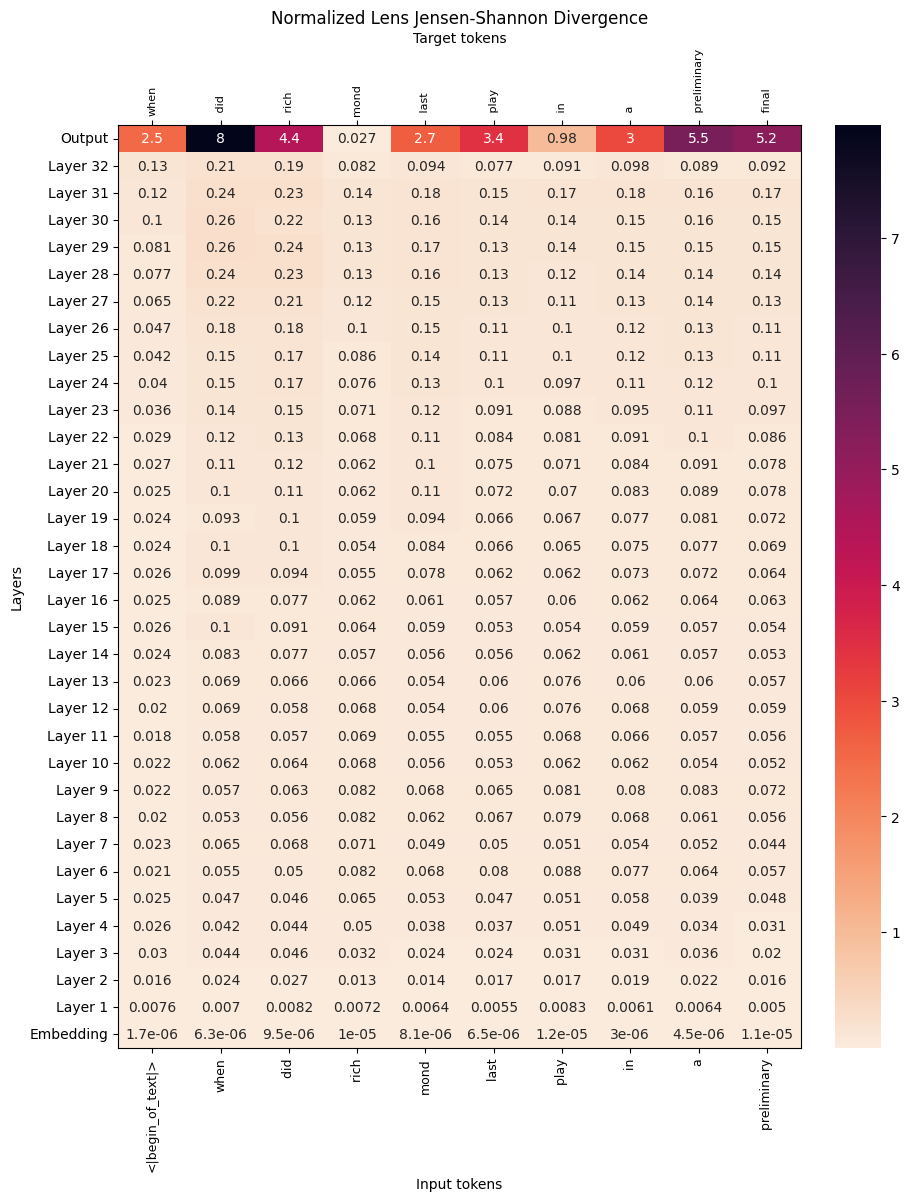

In [51]:
data = norm_data
fig_path = "figs/norm_lens/jsd_div_norm.png"
plot_heatmap(
    data, tokenizer, prompt_id=0,
    metric="kl_ba", color_map="rocket_r",
    title="Normalized Lens Jensen-Shannon Divergence",
    save_path=fig_path
)

In [ ]:
data = raw_data
fig_path = "figs/raw_lens/jsd_div_raw.png"
plot_heatmap(
    data, tokenizer, prompt_id=0,
    metric="jsd_div", color_map="Blues",
    title="Final Layer RMS Lens Jensen-Shannon divergence",
    save_path=fig_path
)

In [ ]:
data = norm_data
fig_raw = "figs/norm_lens/jsd_div_prompt0.png"
plot_heatmap(
    data, tokenizer, prompt_id=0,
    metric="jsd_div", color_map="Blues",
    title="Normalized Lens Jensen-Shannon divergence",
    save_path=fig_raw
)

In [ ]:
data = raw_data
fig_raw = "figs/raw_lens/jsd_div_prompt0.png"
plot_heatmap(
    data, tokenizer, prompt_id=0,
    metric="jsd_div", color_map="Blues",
    title="Non-normalized Lens Jensen-Shannon divergence",
    save_path=fig_raw
)

## Normalized Lens Analysis

In [52]:
import pandas as pd
import glob
import os

def load_all_summaries(base_dir, lens_type, pattern="summary_nq_200_batch*.parquet"):
    """Load and concatenate all batch summaries for a given lens type."""
    path = os.path.join(base_dir, f"batch_{lens_type}", pattern)
    files = sorted(glob.glob(path))
    if not files:
        raise FileNotFoundError(f"No parquet files found for pattern: {path}")

    dfs = [pd.read_parquet(f) for f in files]
    df = pd.concat(dfs, ignore_index=True)
    print(f"Loaded {len(files)} files for {lens_type} ({len(df)} rows total).")
    return df


In [53]:
base_dir = "logs/results_summary"
#summary_raw  = load_all_summaries(base_dir, "raw")
summary_norm = load_all_summaries(base_dir, "norm")

Loaded 10 files for norm (6800 rows total).


In [54]:
summary_norm.head()

,prompt_id,layer_index,layer_name,kl_ab,kl_ba,jsd_div,jsd_dist,vocab_tvd,heat_A,heat_B,...,tail_A@10,tail_B@10,acc_A@20,acc_B@20,agree@20,jaccard@20,prob_overlap@20,prob_mass_overlap@20,tail_A@20,tail_B@20
0,0,0,embed_tokens,0.000007,0.000007,-0.000126,NaN,0.001463,11.761744,11.761747,...,0.999920,0.999920,0.0,0.1,0.0,0.159242,0.270177,2.563531e-08,0.999840,0.999840
1,0,1,layer.0,0.006764,0.006773,0.001561,0.039367,0.045872,11.755253,11.752469,...,0.999871,0.999858,0.0,0.0,0.0,0.048856,0.092582,6.895462e-08,0.999749,0.999726
2,0,2,layer.1,0.018376,0.018451,0.004449,0.066267,0.074915,11.752818,11.746054,...,0.999857,0.999798,0.0,0.1,0.0,0.005263,0.010044,1.054241e-07,0.999724,0.999620
3,0,3,layer.2,0.031486,0.031863,0.007714,0.087167,0.098124,11.748339,11.734060,...,0.999841,0.999729,0.0,0.1,0.0,0.000000,0.000000,1.536646e-07,0.999692,0.999501
4,0,4,layer.3,0.039679,0.040027,0.009727,0.098101,0.111010,11.744475,11.729342,...,0.999823,0.999741,0.0,0.1,0.0,0.002564,0.004981,1.653067e-07,0.999660,0.999514


In [55]:
from scipy.stats import pearsonr, spearmanr

def compute_layerwise_correlations(df_A, df_B, metrics=None):
    """
    Computes Pearson and Spearman correlation across prompts per layer.
    """
    if metrics is None:
        metrics = ["kl_ab", "kl_ba", "jsd_div", "heat_A", "heat_B"]

    # Ensure both have same layers
    common_layers = sorted(set(df_A["layer_name"]) & set(df_B["layer_name"]))
    results = []

    for layer in common_layers:
        sub_A = df_A[df_A["layer_name"] == layer]
        sub_B = df_B[df_B["layer_name"] == layer]
        for metric in metrics:
            if metric in sub_A.columns and metric in sub_B.columns:
                try:
                    # align by prompt_id
                    merged = pd.merge(
                        sub_A[["prompt_id", metric]],
                        sub_B[["prompt_id", metric]],
                        on="prompt_id",
                        suffixes=("_A", "_B")
                    )
                    if len(merged) > 1:
                        pear, _ = pearsonr(merged[f"{metric}_A"], merged[f"{metric}_B"])
                        spear, _ = spearmanr(merged[f"{metric}_A"], merged[f"{metric}_B"])
                    else:
                        pear, spear = float("nan"), float("nan")

                    results.append({
                        "layer_name": layer,
                        "metric": metric,
                        "pearson": pear,
                        "spearman": spear,
                        "n_prompts": len(merged)
                    })
                except Exception as e:
                    print(f"[warn] Skipping {layer}:{metric} → {e}")
                    continue

    return pd.DataFrame(results)
